In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential 
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

/Users/sannujsinghal/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_path = 'raccoons-and-kangaroos/train'
valid_path = 'raccoons-and-kangaroos/valid'
test_path = 'raccoons-and-kangaroos/test'

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224, 224), classes=['raccoons', 'kangaroos'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224, 224), classes=['raccoons', 'kangaroos'], batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224, 224), classes=['raccoons', 'kangaroos'], batch_size=10)

Found 40 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [7]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims)%2 == 0 else len(ims)//rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [8]:
imgs, labels = next(train_batches)

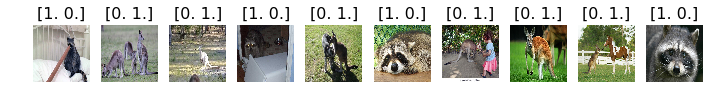

In [9]:
plots(imgs, titles=labels)

In [10]:
model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
        Flatten(),
        Dense(2, activation='softmax'),
    ])

In [11]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit_generator(train_batches, steps_per_epoch=4, 
                    validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

Epoch 1/5
 - 2s - loss: 7.7567 - acc: 0.5000 - val_loss: 9.0664 - val_acc: 0.4375
Epoch 2/5
 - 2s - loss: 8.0590 - acc: 0.5000 - val_loss: 9.0664 - val_acc: 0.4375
Epoch 3/5
 - 2s - loss: 8.0590 - acc: 0.5000 - val_loss: 9.0664 - val_acc: 0.4375
Epoch 4/5
 - 2s - loss: 8.0590 - acc: 0.5000 - val_loss: 9.0664 - val_acc: 0.4375
Epoch 5/5
 - 2s - loss: 8.0590 - acc: 0.5000 - val_loss: 9.0664 - val_acc: 0.4375


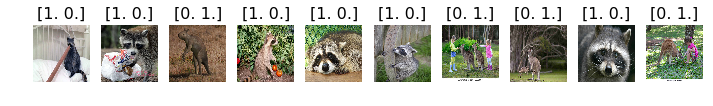

In [39]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [40]:
test_labels = test_labels[:,0]
test_labels

array([1., 1., 0., 1., 1., 1., 0., 0., 1., 0.], dtype=float32)

In [41]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [42]:
predictions

array([[0.47110707, 0.52889293],
       [0.5162274 , 0.48377255],
       [0.47462636, 0.5253737 ],
       [0.47091684, 0.52908313],
       [0.52614695, 0.47385302],
       [0.4710079 , 0.52899206],
       [0.47688478, 0.5231152 ],
       [0.47096443, 0.52903557],
       [0.5232136 , 0.47678635],
       [0.5176654 , 0.48233467]], dtype=float32)

In [43]:
cm = confusion_matrix(test_labels, predictions[:,0])

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [23]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", 
                 color="white" if cm[i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[0 8]
 [0 2]]


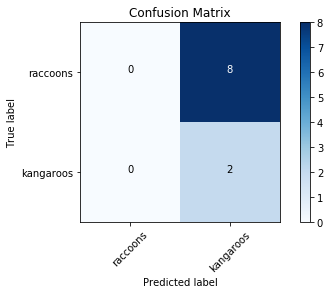

In [44]:
cm_plot_labels = ['raccoons', 'kangaroos']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [25]:
vgg16_model = keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 590s 1us/step


In [26]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [27]:
type(vgg16_model)

keras.engine.training.Model

In [28]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [30]:
model.layers.pop()

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [32]:
for layer in model.layers:
    layer.trainable = False

In [33]:
model.add(Dense(2, activation='softmax'))

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [35]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
model.fit_generator(train_batches, steps_per_epoch=4, validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

Epoch 1/5
 - 30s - loss: 0.6896 - acc: 0.5250 - val_loss: 0.6779 - val_acc: 0.8750
Epoch 2/5
 - 30s - loss: 0.6768 - acc: 0.8500 - val_loss: 0.6669 - val_acc: 1.0000
Epoch 3/5
 - 30s - loss: 0.6660 - acc: 0.9250 - val_loss: 0.6590 - val_acc: 1.0000
Epoch 4/5
 - 30s - loss: 0.6592 - acc: 0.9750 - val_loss: 0.6539 - val_acc: 1.0000
Epoch 5/5
 - 29s - loss: 0.6548 - acc: 0.9750 - val_loss: 0.6503 - val_acc: 1.0000


In [38]:
model.fit_generator(train_batches, steps_per_epoch=4, validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

Epoch 1/5
 - 31s - loss: 0.6517 - acc: 0.9750 - val_loss: 0.6471 - val_acc: 1.0000
Epoch 2/5


KeyboardInterrupt: 

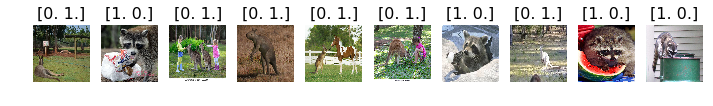

In [51]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [52]:
test_labels = test_labels[:,0]
test_labels

array([0., 1., 0., 0., 0., 0., 1., 0., 1., 1.], dtype=float32)

In [53]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [54]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

Confusion matrix, without normalization
[[6 0]
 [0 4]]


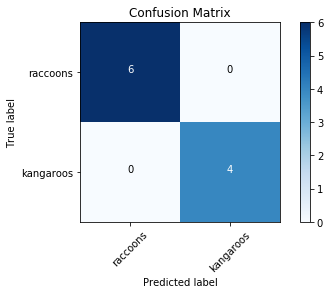

In [56]:
cm_plot_labels = ['raccoons', 'kangaroos']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')